In [69]:
#Plotting Multiple Data Series
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')
%matplotlib inline

In [19]:
data = pd.read_csv(r'C:\Users\Mtime\OneDrive\Bureau\liquor_store_sales.csv')
data

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.00,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.00,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.00,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.00,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.00,4.0,0.0
...,...,...,...,...,...,...,...,...,...
128350,2018,2,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER,66.46,59.0,212.0
128351,2018,2,COASTAL BREWING COMPANY LLC,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,9.08,7.0,35.0
128352,2018,2,BOSTON BEER CORPORATION,99988,SAM ADAMS COLD SNAP 1/6 KG,KEGS,0.00,0.0,32.0
128353,2018,2,NaN,BC,BEER CREDIT,REF,0.00,0.0,-35.0


<AxesSubplot:xlabel='ItemType'>

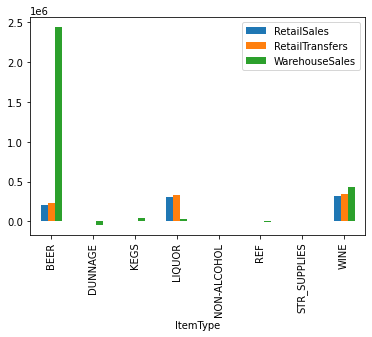

In [21]:
#1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.
total = data[["RetailSales", "RetailTransfers", "WarehouseSales", "ItemType"]].groupby(["ItemType"]).agg("sum")
total.plot.bar()


<AxesSubplot:ylabel='ItemType'>

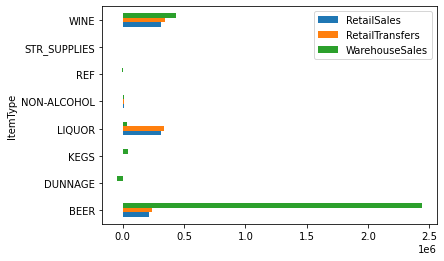

In [22]:
#2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales.
total.plot.barh()

<AxesSubplot:xlabel='Month'>

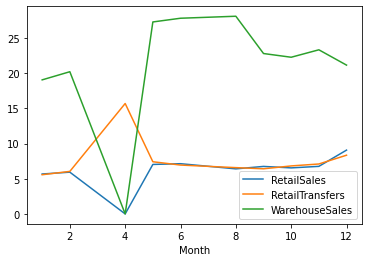

In [32]:
#3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.
total = data[["RetailSales", "RetailTransfers", "WarehouseSales", "Month"]].groupby(["Month"]).agg("mean")
total.plot()


<AxesSubplot:xlabel='Month'>

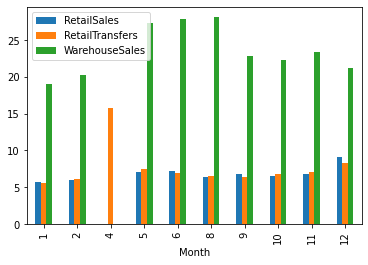

In [34]:
#4. Plot the same information as above but as a bar chart.
total.plot.bar()

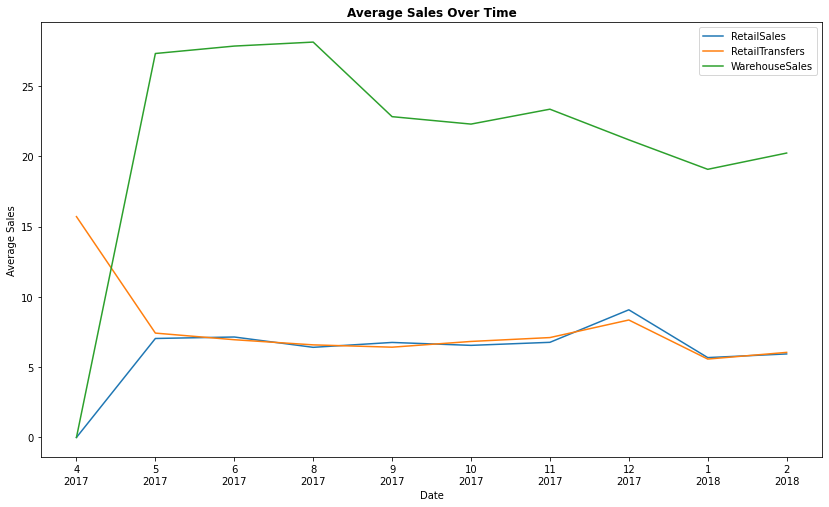

In [40]:
#3'.  Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.
avg_sales = data.groupby(['Year', 'Month']).mean()
xticks = [f"{str(index[1])}\n{str(index[0])}" for index in data.groupby(['Year', 'Month']).groups.keys()]
# Plot
avg_sales.plot(figsize=(14,8))
plt.title('Average Sales Over Time', fontweight=700)
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.xticks(range(len(xticks)), xticks)
plt.show()

<AxesSubplot:xlabel='ItemType'>

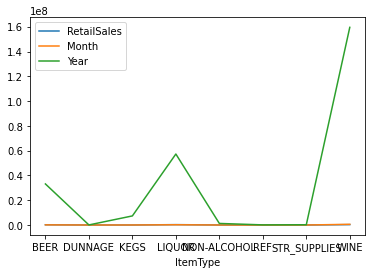

In [52]:
#5 Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).
total = data[["RetailSales","Month", "Year", "ItemType"]].groupby(["ItemType"]).agg("sum")
total.plot()

<AxesSubplot:xlabel='ItemType'>

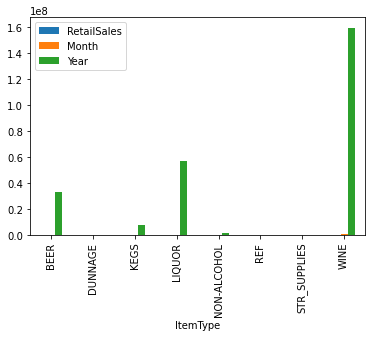

In [53]:
#6. Plot the same information as above but as a bar chart.
total.plot.bar()

<AxesSubplot:xlabel='RetailSales', ylabel='RetailTransfers'>

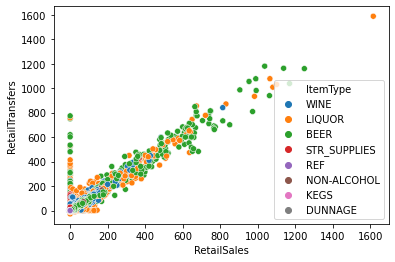

In [58]:
#7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.
sns.scatterplot(data=data, x="RetailSales", y="RetailTransfers" , hue ="ItemType")

array([[<AxesSubplot:xlabel='RetailTransfers', ylabel='RetailTransfers'>,
        <AxesSubplot:xlabel='WarehouseSales', ylabel='RetailTransfers'>],
       [<AxesSubplot:xlabel='RetailTransfers', ylabel='WarehouseSales'>,
        <AxesSubplot:xlabel='WarehouseSales', ylabel='WarehouseSales'>]],
      dtype=object)

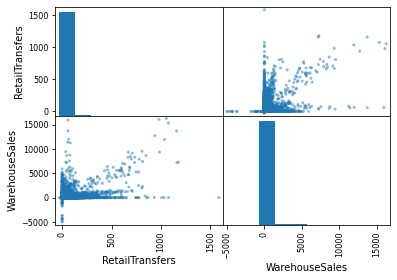

In [72]:
pd.plotting.scatter_matrix(data.iloc[:, 7:9])